In [2]:
import numpy as np 
import pandas as pd

pd.options.display.max_columns = 200
battingDF = pd.read_csv("Batting.csv")
battingDF.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,0,0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,0,0,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,5,0,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,2,2,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,3,0,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN


In [3]:
#top 25 homeruns in a season

battingDF[["playerID","HR","yearID"]].sort_values("HR",ascending=False).head(10)



,playerID,HR,yearID
80752,bondsba01,73,2001
77389,mcgwima01,70,1998
77736,sosasa01,66,1998
78705,mcgwima01,65,1999
81770,sosasa01,64,2001
79053,sosasa01,63,1999
41661,marisro01,61,1961
22256,ruthba01,60,1927
19039,ruthba01,59,1921
24639,foxxji01,58,1932


In [4]:
# lets only look at barry bonds 


# we use the loc function to search for a specific row based on barry's player id
battingDF[["G","playerID","HR","yearID"]].sort_values("yearID",ascending=False).loc[battingDF["playerID"]=="bondsba01"]

,G,playerID,HR,yearID
88805,126,bondsba01,28,2007
87432,130,bondsba01,26,2006
86093,14,bondsba01,5,2005
84761,147,bondsba01,45,2004
83409,130,bondsba01,45,2003
82081,143,bondsba01,46,2002
80752,153,bondsba01,73,2001
79377,143,bondsba01,49,2000
78074,102,bondsba01,34,1999
76749,156,bondsba01,37,1998


C:\Users\jackm\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\jackm\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


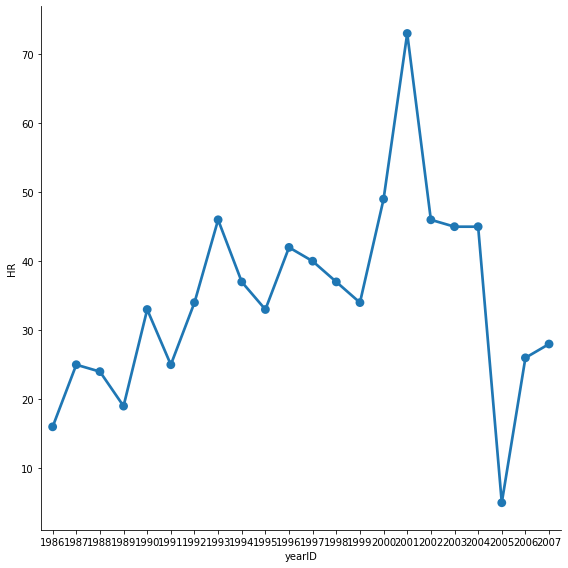

In [5]:
import seaborn as sb 
%matplotlib inline

bbHRStats = battingDF[["G","playerID","HR","yearID"]].sort_values("yearID",ascending=False).loc[battingDF["playerID"]=="bondsba01"]
sb.factorplot(x="yearID",y="HR", data = bbHRStats, size = 8)

In [6]:
# group top 10 home run hitters and plot them by homerun 

len(battingDF["playerID"].unique()) # unique gives us the unique player ids in a set

18915

In [7]:
# introducing: grouping
# .groupby makes a group object
playerIDGrouping = battingDF.groupby("playerID")
type(playerIDGrouping)
len(playerIDGrouping)

18915

In [8]:
playerIDGrouping.groups
#Grouping.groups is a dictionary where the keys are playerIDS
# and the values are row indexes for each player id

{'aardsda01': Int64Index([84639, 87315, 88692, 90077, 91462, 92850, 95595, 97003, 99847], dtype='int64'),
 'aaronha01': Int64Index([36873, 37449, 38104, 38725, 39340, 39978, 40610, 41247, 41945,
             42705, 43457, 44211, 44962, 45736, 46522, 47237, 48169, 49088,
             49971, 50859, 51751, 52665, 53572],
            dtype='int64'),
 'aaronto01': Int64Index([41946, 42706, 44212, 46523, 47238, 48170, 49089], dtype='int64'),
 'aasedo01': Int64Index([54458, 55442, 56402, 57363, 58313, 59257, 61255, 62239, 63237,
             64254, 65302, 66337, 67410],
            dtype='int64'),
 'abadan01': Int64Index([80634, 83292, 87316], dtype='int64'),
 'abadfe01': Int64Index([92851, 94206, 95596, 97004, 98412, 99848, 101333, 101334], dtype='int64'),
 'abadijo01': Int64Index([519, 520], dtype='int64'),
 'abbated01': Int64Index([6951, 7231, 8964, 9364, 9770, 10614, 11060, 11530, 12073, 12074], dtype='int64'),
 'abbeybe01': Int64Index([5461, 5771, 6057, 6351, 6352, 6656], dtype='int64'),

In [9]:
playerIDGrouping.groups["bondsba01"]

Int64Index([63321, 64337, 65393, 66440, 67508, 68624, 69708, 70779, 71937,
            73002, 74255, 75505, 76749, 78074, 79377, 80752, 82081, 83409,
            84761, 86093, 87432, 88805],
           dtype='int64')

In [10]:
playerIDGrouping.get_group("bondsba01")[["HR","AB","yearID"]]
# get group works like a filter
# gives you a data frame where the rows are for playerID 

,HR,AB,yearID
63321,16,413,1986
64337,25,551,1987
65393,24,538,1988
66440,19,580,1989
67508,33,519,1990
68624,25,510,1991
69708,34,473,1992
70779,46,539,1993
71937,37,391,1994
73002,33,506,1995


In [11]:
#lets look at mcguire
playerIDGrouping.get_group("mcgwima01")[["HR","AB","yearID"]]


,HR,AB,yearID
63825,3,53,1986
64858,49,557,1987
65894,32,550,1988
66955,33,490,1989
68062,39,523,1990
69175,22,483,1991
70236,42,467,1992
71370,9,84,1993
72453,9,135,1994
73611,39,317,1995


In [12]:
#total homeruns for barry bonds
sum(playerIDGrouping.get_group("bondsba01")["HR"])
#Do the same thing for max 

762

In [13]:
#we got summary info individual 
totalHomerunsDF = battingDF.groupby("playerID").agg({'HR':sum})
# method: agg
# takes a dicitonary as a parameter
# the key in this dictionary is the column we want to aggregate on
# the value is the function aggregate
# here we are summing the homeruns for all players 


# the agg method which 

In [14]:
totalHomerunsDF.sort_values("HR",ascending = False).head(20) 
totalHomerunsDF.loc["aaronha01"]

HR    755
Name: aaronha01, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001862DCD04C8>]],
      dtype=object)

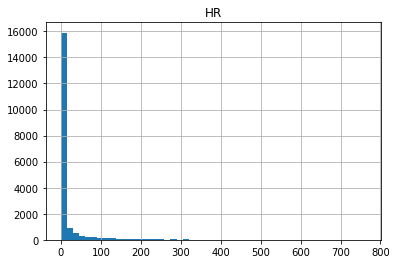

In [15]:
# lets vizualize this
totalHomerunsDF.hist(bins=50)

In [16]:
# whats the average number of homeruns per game per year?
battingDF.groupby("yearID").agg({"HR":np.mean}).sort_values("HR",ascending=False)



,HR
yearID,
1999,4.255581
1987,4.253817
2000,4.113439
2001,4.076176
2004,4.049777
...,...
1876,0.322581
1878,0.287500
1877,0.247423


In [17]:
averageHR = battingDF.groupby("yearID").agg({"HR":np.mean})
averageHR

,HR
yearID,
1871,0.408696
1872,0.224359
1873,0.368000
1874,0.325203
1875,0.183486
...,...
2012,3.504261
2013,3.308020
2014,2.917073


In [18]:
# its important to note that when using groupby
# the column that you are grouping by becomes the dataframe indices (row indexes)

averageHR.columns 

Index(['HR'], dtype='object')

In [19]:
# how to get row indices into a calumn 
# use reset index 
# takes the current indices and puts it into new column
averageHR = averageHR.reset_index()
averageHR

,yearID,HR
0,1871,0.408696
1,1872,0.224359
2,1873,0.368000
3,1874,0.325203
4,1875,0.183486
...,...,...
141,2012,3.504261
142,2013,3.308020
143,2014,2.917073
144,2015,3.303499


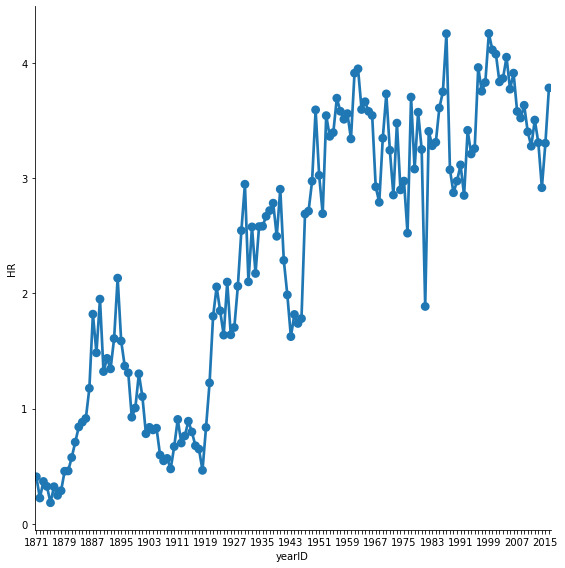

In [20]:
averageHRPlot = sb.catplot(x="yearID",y='HR',data=averageHR,height=8,kind="point")

#for label in averageHRPlot.ax.xaxis.get_ticklabels()[::2]:
    #label.set_visible(False)
counter = 0   
for label in averageHRPlot.ax.xaxis.get_ticklabels():
    if (counter%8 !=0):
        label.set_visible(False)
    counter+=1
# an important reminder: You must run the agg method on a groupby object, not a on a dataframe.    

In [21]:
battingDF.groupby("playerID").agg({"HR":[sum,max],"yearID":[min,max]}).sort_values([('HR','sum')],ascending=False)



HR     yearID      
           sum max    min   max
playerID                       
bondsba01  762  73   1986  2007
aaronha01  755  47   1954  1976
ruthba01   714  60   1914  1935
rodrial01  696  57   1994  2016
mayswi01   660  52   1951  1973
...        ...  ..    ...   ...
hovlijo01    0   0   1909  1911
howarbe01    0   0   2002  2004
howarch01    0   0   1991  1994
howarch02    0   0   1993  1995
zychto01     0   0   2015  2016

[18915 rows x 4 columns]

In [22]:
# lets get the total years played (max-min)
# using min max
battingDF.groupby('playerID').agg({"HR":sum,"yearID":[min,max, lambda x:max(x)-min(x)]}).sort_values([("HR","sum")],ascending=False)


HR yearID                 
           sum    min   max <lambda_0>
playerID                              
bondsba01  762   1986  2007         21
aaronha01  755   1954  1976         22
ruthba01   714   1914  1935         21
rodrial01  696   1994  2016         22
mayswi01   660   1951  1973         22
...        ...    ...   ...        ...
hovlijo01    0   1909  1911          2
howarbe01    0   2002  2004          2
howarch01    0   1991  1994          3
howarch02    0   1993  1995          2
zychto01     0   2015  2016          1

[18915 rows x 4 columns]

In [23]:
# lets look at the top 10 homerun hitters 
topHRHitters = battingDF.groupby("playerID").agg({"HR":sum}).sort_values("HR",ascending=False).iloc[0:10]
topHRHitters

,HR
playerID,
bondsba01,762
aaronha01,755
ruthba01,714
rodrial01,696
mayswi01,660
griffke02,630
thomeji01,612
sosasa01,609
pujolal01,591


In [28]:
# filtering data
# using isin as a list mask inside of loc

# lets see if we can grab the playerIDs, and get some info about their seasons
topHRHitters.index                    # ----> we can make the values of an index into a list
topHRHittersNames = list(topHRHitters.index)
battingDF["playerID"].isin(topHRHitters.index)

topHRHittersRecords = battingDF.loc[battingDF["playerID"].isin(topHRHitters.index)]
topHRHittersRecords.

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
15049,ruthba01,1914,1,BOS,AL,5,10,1,2,1,0,0,2.0,0.0,NaN,0,4.0,NaN,0.0,0.0,NaN,NaN
15834,ruthba01,1915,1,BOS,AL,42,92,16,29,10,1,4,21.0,0.0,NaN,9,23.0,NaN,0.0,2.0,NaN,NaN
16455,ruthba01,1916,1,BOS,AL,67,136,18,37,5,3,3,15.0,0.0,NaN,10,23.0,NaN,0.0,4.0,NaN,NaN
16976,ruthba01,1917,1,BOS,AL,52,123,14,40,6,3,2,12.0,0.0,NaN,12,18.0,NaN,0.0,7.0,NaN,NaN
17490,ruthba01,1918,1,BOS,AL,95,317,50,95,26,11,11,66.0,6.0,NaN,58,58.0,NaN,2.0,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99458,pujolal01,2014,1,LAA,AL,159,633,89,172,37,1,28,105.0,5.0,1.0,48,71.0,11.0,5.0,0.0,9.0,28.0
100930,pujolal01,2015,1,LAA,AL,157,602,85,147,22,0,40,95.0,5.0,3.0,50,72.0,10.0,6.0,0.0,3.0,15.0
100999,rodrial01,2015,1,NYA,AL,151,523,83,131,22,1,33,86.0,4.0,0.0,84,145.0,5.0,6.0,0.0,7.0,17.0
102405,pujolal01,2016,1,LAA,AL,152,593,71,159,19,0,31,119.0,4.0,0.0,49,75.0,6.0,2.0,0.0,6.0,24.0


In [29]:
# using query to find out 

battingDF.query("playerID in @ topHRHittersNames")


,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
15049,ruthba01,1914,1,BOS,AL,5,10,1,2,1,0,0,2.0,0.0,NaN,0,4.0,NaN,0.0,0.0,NaN,NaN
15834,ruthba01,1915,1,BOS,AL,42,92,16,29,10,1,4,21.0,0.0,NaN,9,23.0,NaN,0.0,2.0,NaN,NaN
16455,ruthba01,1916,1,BOS,AL,67,136,18,37,5,3,3,15.0,0.0,NaN,10,23.0,NaN,0.0,4.0,NaN,NaN
16976,ruthba01,1917,1,BOS,AL,52,123,14,40,6,3,2,12.0,0.0,NaN,12,18.0,NaN,0.0,7.0,NaN,NaN
17490,ruthba01,1918,1,BOS,AL,95,317,50,95,26,11,11,66.0,6.0,NaN,58,58.0,NaN,2.0,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99458,pujolal01,2014,1,LAA,AL,159,633,89,172,37,1,28,105.0,5.0,1.0,48,71.0,11.0,5.0,0.0,9.0,28.0
100930,pujolal01,2015,1,LAA,AL,157,602,85,147,22,0,40,95.0,5.0,3.0,50,72.0,10.0,6.0,0.0,3.0,15.0
100999,rodrial01,2015,1,NYA,AL,151,523,83,131,22,1,33,86.0,4.0,0.0,84,145.0,5.0,6.0,0.0,7.0,17.0
102405,pujolal01,2016,1,LAA,AL,152,593,71,159,19,0,31,119.0,4.0,0.0,49,75.0,6.0,2.0,0.0,6.0,24.0


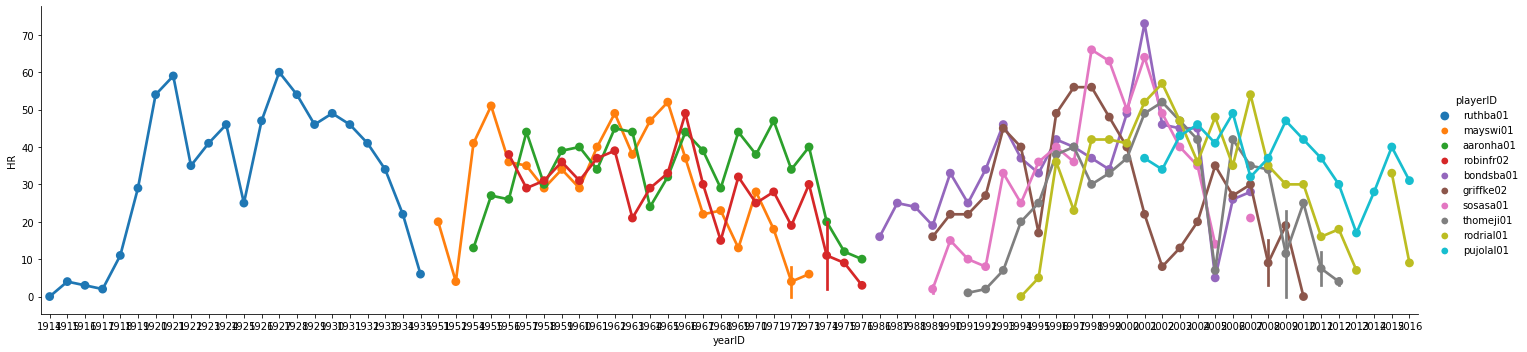

In [40]:
sb.catplot(x="yearID",y="HR",hue="playerID",data=topHRHittersRecords,kind="point",aspect=4)

In [43]:
# sammy sosa and mark mcguire 
sosamcGDF = battingDF.query("playerID == 'sosasa01' or playerID == 'mcgwima01'")
sosamcGDF

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
63825,mcgwima01,1986,1,OAK,AL,18,53,10,10,1,0,3,9.0,0.0,1.0,4,18.0,0.0,1.0,0.0,0.0,0.0
64858,mcgwima01,1987,1,OAK,AL,151,557,97,161,28,4,49,118.0,1.0,1.0,71,131.0,8.0,5.0,0.0,8.0,6.0
65894,mcgwima01,1988,1,OAK,AL,155,550,87,143,22,1,32,99.0,0.0,0.0,76,117.0,4.0,4.0,1.0,4.0,15.0
66955,mcgwima01,1989,1,OAK,AL,143,490,74,113,17,0,33,95.0,1.0,1.0,83,94.0,5.0,3.0,0.0,11.0,23.0
67250,sosasa01,1989,1,TEX,AL,25,84,8,20,3,0,1,3.0,0.0,2.0,0,20.0,0.0,0.0,4.0,0.0,3.0
67251,sosasa01,1989,2,CHA,AL,33,99,19,27,5,0,3,10.0,7.0,3.0,11,27.0,2.0,2.0,1.0,2.0,3.0
68062,mcgwima01,1990,1,OAK,AL,156,523,87,123,16,0,39,108.0,2.0,1.0,110,116.0,9.0,7.0,1.0,9.0,13.0
68368,sosasa01,1990,1,CHA,AL,153,532,72,124,26,10,15,70.0,32.0,16.0,33,150.0,4.0,6.0,2.0,6.0,10.0
69175,mcgwima01,1991,1,OAK,AL,154,483,62,97,22,0,22,75.0,2.0,1.0,93,116.0,3.0,3.0,1.0,5.0,13.0
69458,sosasa01,1991,1,CHA,AL,116,316,39,64,10,1,10,33.0,13.0,6.0,14,98.0,2.0,2.0,5.0,1.0,5.0


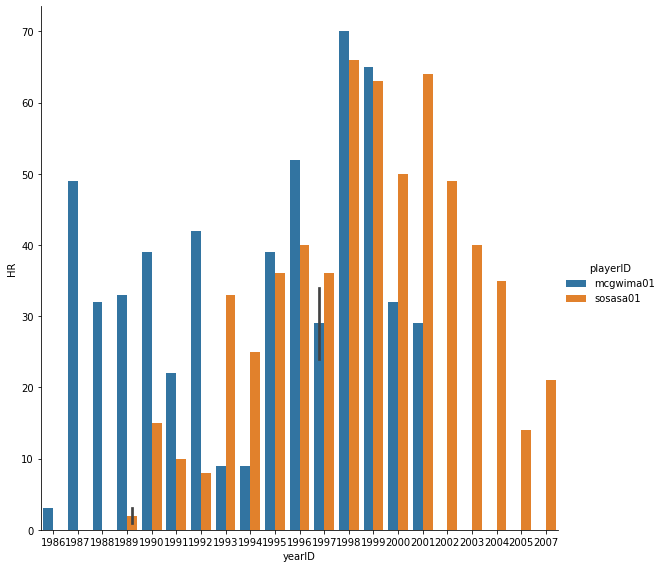

In [46]:
sb.catplot(x="yearID",y="HR", hue="playerID", data = sosamcGDF, kind="bar",size= 8)

In [ ]:
# those lines are confidence intervals. 
# one of the ways to get rid of these confidence intervals ci in seaborn, ci - sone
# catplot: ci = None
# we could do  a groupby on the dataframe on homeruns 




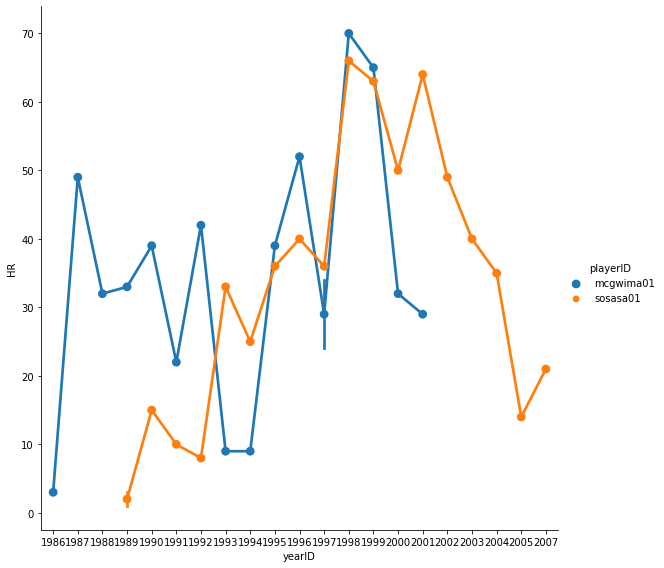

In [49]:
# point line allow us to see trends in the data
# save plots as png 

sb.catplot(x="yearID",y="HR", hue="playerID", data = sosamcGDF, kind="point",size= 8)

C:\Users\jackm\Anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


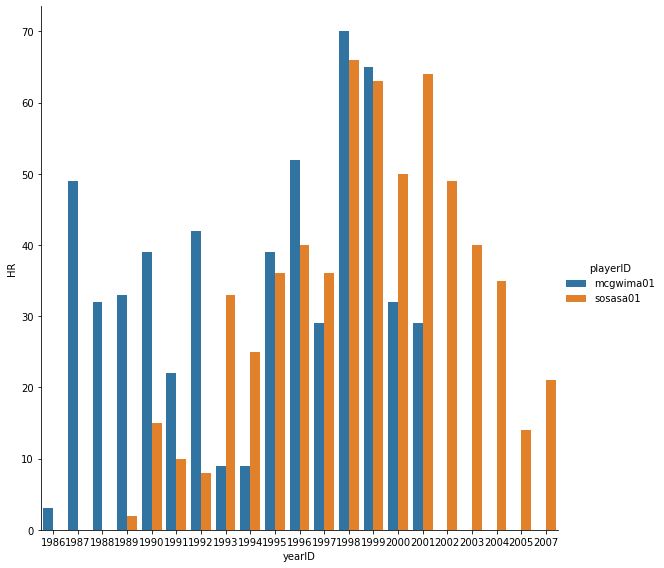

In [50]:
# save plot as png
sosaMcGPlot = sb.catplot(x="yearID",y="HR", hue="playerID", data = sosamcGDF, kind="bar",size= 8, ci=None)
sosaMcGPlot.savefig("sosaMcGPlot.png")

In [53]:
# we estimate that at bats affects the number of home runs a player is likley to hot
# i.e more at-bats typically correlates with more home runs
# we can normalize the data to compare apples to apples
# meaning we'll get a better sense of who is the best  HR hitter is, sosa or mcG

# lets createa  new column called HRperG which is home Runs per game 
sosamcGDF ["HRperG"] = sosamcGDF["HR"]/sosamcGDF["G"]
sosamcGDF

C:\Users\jackm\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,HRperG
63825,mcgwima01,1986,1,OAK,AL,18,53,10,10,1,0,3,9.0,0.0,1.0,4,18.0,0.0,1.0,0.0,0.0,0.0,0.166667
64858,mcgwima01,1987,1,OAK,AL,151,557,97,161,28,4,49,118.0,1.0,1.0,71,131.0,8.0,5.0,0.0,8.0,6.0,0.324503
65894,mcgwima01,1988,1,OAK,AL,155,550,87,143,22,1,32,99.0,0.0,0.0,76,117.0,4.0,4.0,1.0,4.0,15.0,0.206452
66955,mcgwima01,1989,1,OAK,AL,143,490,74,113,17,0,33,95.0,1.0,1.0,83,94.0,5.0,3.0,0.0,11.0,23.0,0.230769
67250,sosasa01,1989,1,TEX,AL,25,84,8,20,3,0,1,3.0,0.0,2.0,0,20.0,0.0,0.0,4.0,0.0,3.0,0.040000
67251,sosasa01,1989,2,CHA,AL,33,99,19,27,5,0,3,10.0,7.0,3.0,11,27.0,2.0,2.0,1.0,2.0,3.0,0.090909
68062,mcgwima01,1990,1,OAK,AL,156,523,87,123,16,0,39,108.0,2.0,1.0,110,116.0,9.0,7.0,1.0,9.0,13.0,0.250000
68368,sosasa01,1990,1,CHA,AL,153,532,72,124,26,10,15,70.0,32.0,16.0,33,150.0,4.0,6.0,2.0,6.0,10.0,0.098039
69175,mcgwima01,1991,1,OAK,AL,154,483,62,97,22,0,22,75.0,2.0,1.0,93,116.0,3.0,3.0,1.0,5.0,13.0,0.142857
69458,sosasa01,1991,1,CHA,AL,116,316,39,64,10,1,10,33.0,13.0,6.0,14,98.0,2.0,2.0,5.0,1.0,5.0,0.086207


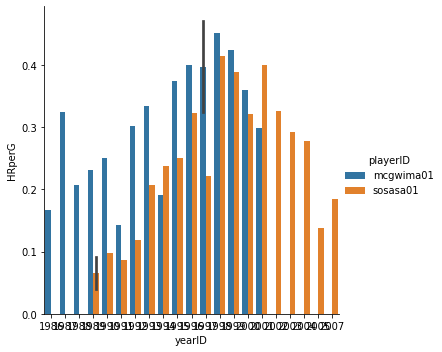

In [54]:
#plot this new column
sb.catplot(x="yearID",y="HRperG",data=sosamcGDF,hue="playerID",kind="bar")